#### Modelado


Para hacer un mapeo rápido de posibilidades usaremos Pycaret. Además, para poder ordenar el proyecto usaremos mlflow.



In [4]:
#Probando mlflow
import os
import warnings
import sys

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import ElasticNet, LinearRegression, Lasso
from urllib.parse import urlparse

import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [5]:
#Load data and set seed
seed = 40

warnings.filterwarnings("ignore")
np.random.seed(seed)
# Read the csv file from the path
csv_path = (
    "../data/train_encoded.csv",
    "../data/test_encoded.csv"
)
try:
    train = pd.read_csv(csv_path[0])
    test = pd.read_csv(csv_path[1])
    
except Exception as e:
    logger.exception(
        "Unable to load training & test CSV. Error: %s", e
    )

In [6]:
train_x = train.select_dtypes(exclude='object').drop(["Precio_m2_total"], axis=1)
test_x = test.select_dtypes(exclude='object').drop(["Precio_m2_total"], axis=1)
train_y = train[["Precio_m2_total"]]
test_y = test[["Precio_m2_total"]]

In [7]:
data = pd.concat([train,test])
data

,latitud,longitud,Barrio,Ciudad,Area_total,Area_constr,MONEDA,Area_constr_cat,NroBanios,Dormitorios,Antiguedad,Cocheras,geohash_grado5,geohash_grado6,geohash_grado7,geohash_grado8,geohash_grado9,Precio_m2_total
0,-12.070790,-77.019494,23,2,325.0,237.0,0,5.0,3.0,6.0,37.0,2.0,6mc5r,6mc5r6,6mc5r6s,6mc5r6s4,6mc5r6s4e,4146.153846
1,-12.077229,-76.929563,20,2,2535.0,402.0,1,14.0,4.0,4.0,21.0,4.0,6mc73,6mc733,6mc733m,6mc733mt,6mc733mt5,3500.000000
2,-12.086676,-76.930033,20,2,1500.0,700.0,0,19.0,5.0,4.0,20.0,5.0,6mc71,6mc71r,6mc71rt,6mc71rtq,6mc71rtq0,2688.000000
3,-12.150773,-77.020962,3,2,600.0,768.0,1,19.0,9.0,8.0,63.0,2.0,6mc4z,6mc4zk,6mc4zk5,6mc4zk50,6mc4zk509,12250.000000
4,-12.105563,-77.042509,43,2,420.0,820.0,1,19.0,5.0,5.0,21.0,4.0,6mc5n,6mc5nu,6mc5nu5,6mc5nu5r,6mc5nu5rg,29166.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,-12.110621,-77.031413,31,2,137.0,209.0,1,4.0,3.0,4.0,45.0,2.0,6mc5p,6mc5p5,6mc5p57,6mc5p576,6mc5p576t,14306.569343
550,-12.137681,-76.984258,52,2,280.0,203.0,0,4.0,3.0,4.0,23.0,2.0,6mc6b,6mc6bn,6mc6bnm,6mc6bnmu,6mc6bnmub,5259.464286
551,-12.108649,-77.030352,31,2,225.0,225.0,0,5.0,3.0,4.0,33.0,2.0,6mc5p,6mc5p5,6mc5p5s,6mc5p5sn,6mc5p5snn,0.351111
552,-12.074163,-77.103809,48,2,170.0,170.0,0,2.0,3.0,6.0,27.0,2.0,6mc5m,6mc5m3,6mc5m3y,6mc5m3yw,6mc5m3ywz,7200.000000


In [9]:
from pycaret.regression import *

exp_101 = setup(data = data.select_dtypes(exclude='object'),
               target = "Precio_m2_total", session_id = 102,
               normalize = True, remove_multicollinearity = True, log_experiment = True,
               experiment_name = 'experiment_102')

,Description,Value
0,session_id,102
1,Target,Precio_m2_total
2,Original Data,"(5534, 13)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3873, 14)"


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Precio_m2_total',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('dummy', Dummify(target='Precio_m2_total')),
                ('fix_perfect', Remove_100(targ

In [10]:
top_3_models = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1389.5874,4742996.9501,2171.8538,0.6049,0.4691,4.5505,0.2260
rf,Random Forest Regressor,1370.0005,4853438.0098,2197.5229,0.5956,0.4769,4.6071,0.9740
gbr,Gradient Boosting Regressor,1457.0571,5122503.3297,2255.9338,0.5735,0.4884,4.1250,0.3070
et,Extra Trees Regressor,1397.6320,5264191.9415,2289.6376,0.5598,0.4817,4.5633,0.7670
knn,K Neighbors Regressor,1590.1389,6361263.6000,2516.9858,0.4693,0.5035,5.5999,0.0350
lasso,Lasso Regression,1944.1521,8483355.4500,2906.1768,0.2921,0.6070,9.3897,0.0220
ridge,Ridge Regression,1944.4360,8490469.1500,2907.2730,0.2915,0.6047,9.3682,0.0170
llar,Lasso Least Angle Regression,1942.6786,8503012.0964,2909.2776,0.2915,0.6054,10.7117,0.0150
br,Bayesian Ridge,1946.1095,8498539.6127,2908.6536,0.2910,0.6059,9.3700,0.0180
lar,Least Angle Regression,1944.7253,8497524.9892,2908.2886,0.2908,0.6087,9.3375,0.0200


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=101, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
      

In [10]:
lgbm = create_model('lightgbm', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1404.9690,7188312.4405,2681.1028,0.5270,0.4497,12.9249
1,1438.2421,4837471.9786,2199.4254,0.6013,0.4354,8.4921
2,1489.0767,6792377.8004,2606.2191,0.5207,0.4549,1.2804
3,1311.9961,3775211.3258,1942.9903,0.5994,0.4790,2.1239
4,1509.8106,5615374.7315,2369.6782,0.5637,0.4367,0.7600
Mean,1430.8189,5641749.6554,2359.8832,0.5624,0.4511,5.1163
SD,69.9655,1252782.9126,269.6315,0.0343,0.0158,4.7962


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=102, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [11]:
rf = create_model('rf', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1363.4358,7135736.4262,2671.2799,0.5305,0.4559,13.8112
1,1363.5578,4554988.1274,2134.2418,0.6245,0.4300,11.0460
2,1462.5616,6817421.1129,2611.0192,0.5189,0.4536,1.4220
3,1333.8225,4111301.6530,2027.6345,0.5637,0.4959,3.3900
4,1434.8615,5316311.3665,2305.7128,0.5869,0.4368,0.7503
Mean,1391.6479,5587151.7372,2349.9776,0.5649,0.4544,6.0839
SD,48.6311,1202374.8975,254.4737,0.0383,0.0229,5.3249


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=102, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


#### Tuneando modelos:

In [12]:
tuned_lgbm = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1347.3977,4051499.4062,2012.8337,0.6061,0.3424,0.2688
1,1484.1650,10343172.8664,3216.0804,0.4849,0.5334,26.4641
2,1366.1339,3854011.4711,1963.1636,0.6536,0.4067,0.3046
3,1429.8260,5500136.3589,2345.2370,0.5809,0.4833,25.5438
4,1517.0388,5704311.6878,2388.3701,0.6079,0.5264,2.4880
5,1507.4573,7917895.2121,2813.8755,0.4227,0.4652,0.3264
6,1261.6237,3545778.2617,1883.0237,0.6205,0.4740,2.8194
7,1284.6285,3475393.3983,1864.2407,0.6332,0.4657,0.9599
8,1421.6348,4850785.0160,2202.4498,0.6296,0.4854,1.1920
9,1514.6693,5568979.9764,2359.8686,0.5595,0.4023,0.3172


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(bagging_fraction=0.5, bagging_freq=0, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=6, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=270, n_jobs=-1, num_leaves=10, objective=None,
              random_state=102, reg_alpha=1e-07, reg_lambda=10, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [17]:
tuned_rd = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1435.4571,4702068.3924,2168.4253,0.5409,0.3851,0.3495
1,1388.2684,6242410.5409,2498.4816,0.5363,0.4472,0.7878
2,1545.0861,5863292.9948,2421.4238,0.5637,0.4110,0.3734
3,1453.3362,5959330.3243,2441.1740,0.5507,0.5239,8.5935
4,1460.9162,5042130.6186,2245.4689,0.5654,0.5673,4.7688
5,1496.8756,5912861.5602,2431.6376,0.5800,0.5778,21.0087
6,1416.1995,5324864.5593,2307.5668,0.5363,0.4304,0.6287
7,1404.0286,3771108.6005,1941.9342,0.5798,0.3966,0.3583
8,1346.2840,4007461.0740,2001.8644,0.6432,0.4784,4.8073
9,1369.4149,4746712.1335,2178.6951,0.6129,0.6163,3.5017


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 6
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.1,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=-1, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


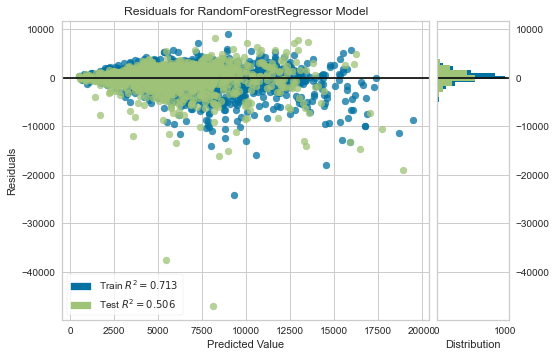

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [20]:
plot_model(tuned_rd)

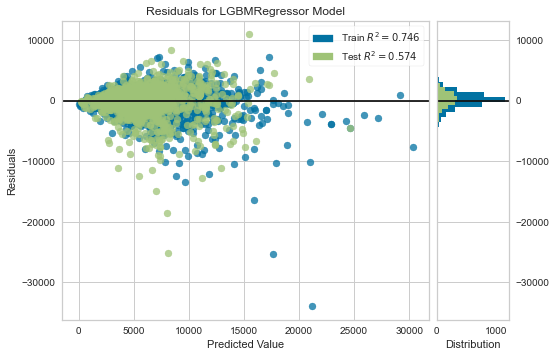

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [13]:
plot_model(tuned_lgbm)

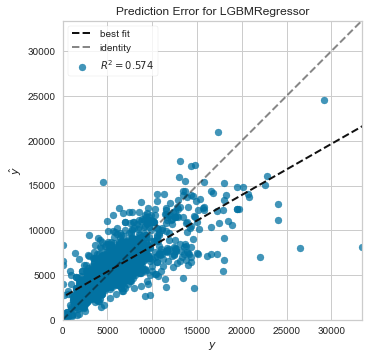

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [14]:
plot_model(tuned_lgbm, plot='error')

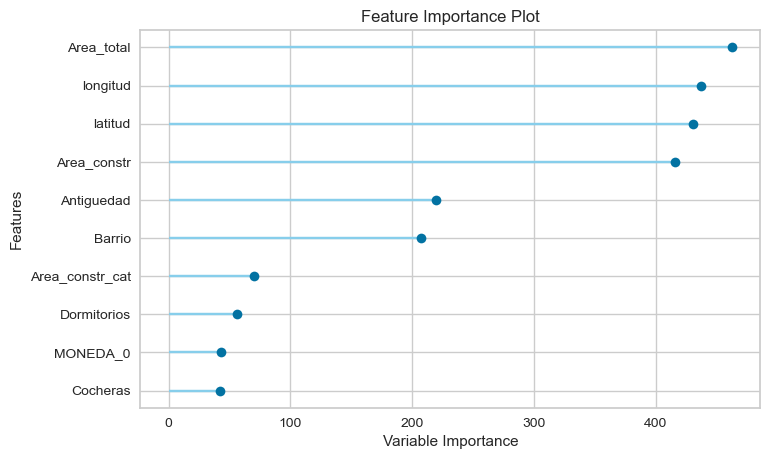

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [15]:
plot_model(tuned_lgbm, plot='feature')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMRegressor(bagging_fraction=0.5, bagging_freq=0, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=6, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=270, n_jobs=-1, num_leaves=10, objective=None,
              random_state=102, reg_alpha=1e-07, reg_lambda=10, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


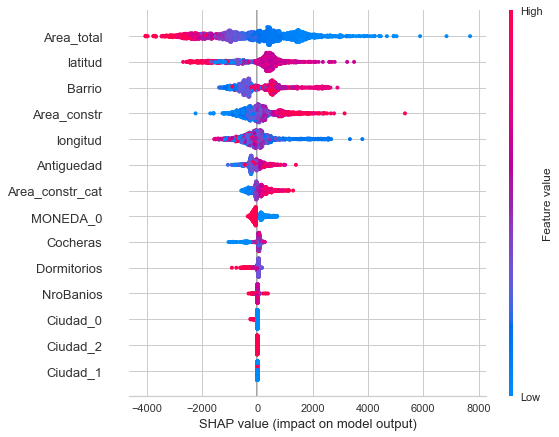

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [16]:
interpret_model(tuned_lgbm)

#### MLFLow:

In [4]:
def _get_params(estimator):
    """
    Obtendremos los parametros del estimador como forma de diccionario para llamar y loggear.
    """
    all_params = estimator.get_params()

    params_to_log = {k:v for k,v in all_params.items() if k in ['alpha','fit_intercept']} #Esto es lo configurable.
    
    return params_to_log
    
def _get_metrics(y_true, y_pred):
    """
    y_pred: predicciones.
    y_true: valores reales del test.
    
    Retornaremos las métricas del estimador como forma de diccionario para llamar y loggear.
    """
    
    metrics_to_log = {
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE' : mean_absolute_error(y_true, y_pred),
        'R2' : r2_score(y_true, y_pred),
        'MSE' : mean_squared_error(y_true, y_pred)
    }
    
    return metrics_to_log

def log_metrics_params(metrics_to_log, params_to_log):
    for nombre_metrica, valor_metrica in metrics_to_log.items():
        mlflow.log_metric(nombre_metrica, valor_metrica)
    
    for nombre_param, valor_param in params_to_log.items():
        mlflow.log_param(nombre_param, valor_param)

def _my_scorer(estimator, X_test, y_test):
    """
    Esta función va dentro del Loop del GridSearch. Después del fit y antes de la evaluación.
    
    Acá también llamaremos a MlFlow para tener un tracking de los modelos. Así como loggear el mejor modelo luego.
    Podemos aprovechar para loggear entre los batchs.
    
    """
    n = 0
    with mlflow.start_run():
        n+=1
        
        preds = estimator.predict(X_test)
        metricas = _get_metrics(y_test, preds)
        params = _get_params(estimator)
        log_metrics_params(metricas, params)
        est_name = estimator.__class__.__name__
    
        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
        
        if tracking_url_type_store != 'file':
            mlflow.sklearn.log_model(estimator, "{}_{}".format(est_name, str(n)),
                                     registered_model_name = "{}_{}".format(est_name, str(n)))
                                                              
        else:
            mlflow.sklearn.log_model(estimator, "{}_{}".format(est_name, str(n)))
        
    return metricas['MSE']

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

parameters = {
    'alpha' : [0.1, 0.5, 2, 4],
    'fit_intercept':[True, False]
}

grid_pipe = GridSearchCV(lasso, parameters, scoring=_my_scorer,cv = 2)

grid_pipe.fit(train_x, train_y)

grid_pipe.best_params_

{'alpha': 0.1, 'fit_intercept': True}

In [6]:
import pycaret

In [ ]:
#Idealmente se crea un sys.argv para poder pasar un argumento desde un .sh 

#alpha = float(sys.argv[1]) if len(sys.argv) > 1 else 0.5        #<----------------------
#l1_ratio = float(sys.argv[2]) if len(sys.argv) > 2 else 0.5     #<----------------------

alpha = 0.5
l1_ratio = 0.5

In [ ]:
#Creamos un experimento de MLFlow
experiment_id = mlflow.create_experiment("Linear Models")
experiment = mlflow.get_experiment(experiment_id)
print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))

In [17]:
LinearRegression().get_params()

^C


In [ ]:
with mlflow.start_run(): ### Qué hace esto..
    
    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state = seed)
    lr.fit(train_x, train_y)
    
    predicciones = lr.predict(test_x)
    
    (rmse, mae, r2) = eval_metrics(test_y, predicciones)
    
    print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
    print("  RMSE: %s" % rmse)
    print("  MAE: %s" % mae)
    print("  R2: %s" % r2)
    
    #Ahora haremos el log de los parámetros:
    
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1_ratio)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    
    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme #<-----------------------------
    
    if tracking_url_type_store != "file":
        
        #Existen varias formas de hacer el registro del modelo.
        
        mlflow.sklearn.log_model(lr, "model", registered_model_name="ElasticNet_1")
        
    else:
        mlflow.sklearn.log_model(lr,"model")

Fuentes:

https://danielhnyk.cz/adding-callback-to-a-sklearn-gridsearch/

https://stackoverflow.com/questions/61783042/is-there-a-standard-way-to-implement-callbacks-with-gridsearchcv

